<a href="https://colab.research.google.com/github/nikhilRajput-prog/Deep-Learning-Lab-File/blob/main/Deep_Learning_Experiment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Experiment 3

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification


In [12]:
# Generate linearly separable data
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=2,
    random_state=42
)
y = y.reshape(-1, 1)
# Sigmoid activation
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialize weights and bias
np.random.seed(42)
W = np.random.randn(2, 1)
b = 0.0
lr = 0.1
epochs = 1000
losses = []

In [13]:
for _ in range(epochs):
    z = np.dot(X, W) + b
    y_pred = sigmoid(z)

    # Binary cross-entropy loss
    loss = -np.mean(y * np.log(y_pred + 1e-8) + (1 - y) * np.log(1 - y_pred + 1e-8))
    losses.append(loss)

    # Gradients
    dW = np.dot(X.T, (y_pred - y)) / len(X)
    db = np.mean(y_pred - y)

    # Update weights
    W -= lr * dW
    b -= lr * db

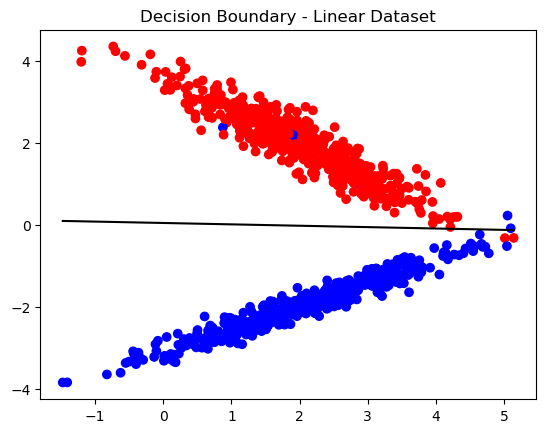

In [14]:
# Decision boundary
x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x2 = -(W[0] * x1 + b) / W[1]

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap='bwr')
plt.plot(x1, x2, color='black')
plt.title("Decision Boundary - Linear Dataset")
plt.show()

####2:Multi-Layer Neural Network(make_moons)

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [16]:
# Generate non-linear dataset
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)
y = y.reshape(-1, 1)

# Activation functions
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [17]:
# Initialize parameters
np.random.seed(42)
W1 = np.random.randn(2, 10)
b1 = np.zeros((1, 10))
W2 = np.random.randn(10, 1)
b2 = np.zeros((1, 1))

lr = 0.05
epochs = 2000
losses = []

In [18]:
# Training loop
for _ in range(epochs):
    # Forward pass
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    y_pred = sigmoid(z2)

    # Loss
    loss = -np.mean(y * np.log(y_pred + 1e-8) + (1 - y) * np.log(1 - y_pred + 1e-8))
    losses.append(loss)

    # Backpropagation
    dz2 = y_pred - y
    dW2 = np.dot(a1.T, dz2) / len(X)
    db2 = np.mean(dz2, axis=0)

    da1 = np.dot(dz2, W2.T)
    dz1 = da1 * relu_derivative(z1)
    dW1 = np.dot(X.T, dz1) / len(X)
    db1 = np.mean(dz1, axis=0)

    # Update
    W2 -= lr * dW2
    b2 -= lr * db2
    W1 -= lr * dW1
    b1 -= lr * db1

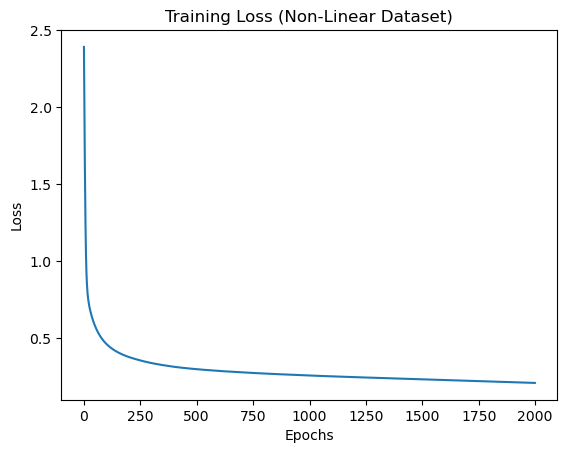

In [19]:
# Plot loss
plt.figure()
plt.plot(losses)
plt.title("Training Loss (Non-Linear Dataset)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

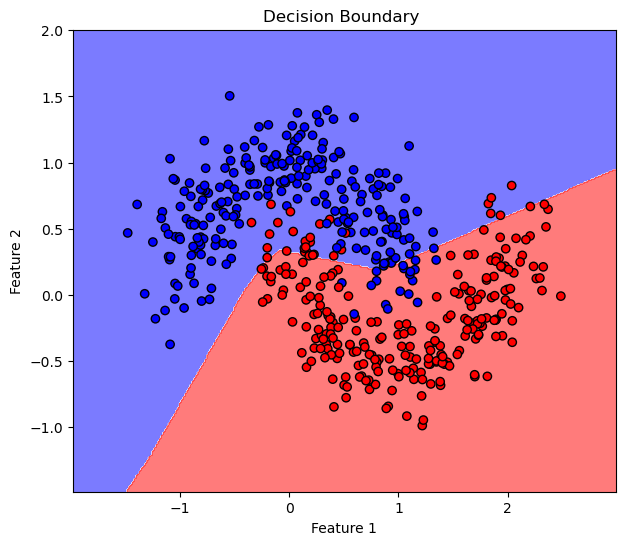

In [20]:
# Create grid
xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 300),
    np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 300)
)

grid = np.c_[xx.ravel(), yy.ravel()]

# Forward pass on grid
z1 = relu(np.dot(grid, W1) + b1)
z2 = sigmoid(np.dot(z1, W2) + b2)

# Convert probabilities to class labels
Z = (z2 > 0.5).astype(int)
Z = Z.reshape(xx.shape)

# Plot decision regions
plt.figure(figsize=(7, 6))
plt.contourf(xx, yy, Z, alpha=0.6, cmap='bwr')

# Plot actual data points
plt.scatter(
    X[:, 0], X[:, 1],
    c=y.flatten(),
    cmap='bwr',
    edgecolors='k'
)

plt.title("Decision Boundary ")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


Question 1: How a perceptron learns a linear decision boundary.

 Answer: A perceptron updates weights using gradient descent to minimize loss, resulting in a linear decision boundary defined by a weighted sum of inputs.

Question 2: Why a single-layer neural network fails for non-linear problems.

Answer: Because a single-layer network can represent only linear functions and cannot model non-linear decision boundaries.

Question 3: How adding hidden layers and non-linear activation functions enables learning complex decision boundaries.

Answer: Activation functions introduce non-linearity, without which a neural network would behave like a linear model regardless of depth.

####